In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import numpy.matlib
import pandas as pd
import numpy.linalg as la
%matplotlib inline



In [2]:
df = pd.read_csv('breast-cancer-wisconsin.data.csv',header=None)
df

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [3]:
df.isnull().any().any()

False

In [4]:
df.rename(columns={0:'id',1:'clump thickness',2:'uniformity of cellsize',
           3:'uniformity of cell shape',4:'marginal adhesion', 
           5:'single epithelial cell size',6:'bare nuclei', 
           7:'bland chromatin',8:'normal nucleoli',9:'mitosis',10:'class'},inplace=True)

'''Sample code number: id number
Clump Thickness: 1 - 10
Uniformity of Cell Size: 1 - 10
Uniformity of Cell Shape: 1 - 10
Marginal Adhesion: 1 - 10
Single Epithelial Cell Size: 1 - 10
Bare Nuclei: 1 - 10
Bland Chromatin: 1 - 10
Normal Nucleoli: 1 - 10
Mitoses: 1 - 10
Class: (2 for benign, 4 for malignant)'''


'Sample code number: id number\nClump Thickness: 1 - 10\nUniformity of Cell Size: 1 - 10\nUniformity of Cell Shape: 1 - 10\nMarginal Adhesion: 1 - 10\nSingle Epithelial Cell Size: 1 - 10\nBare Nuclei: 1 - 10\nBland Chromatin: 1 - 10\nNormal Nucleoli: 1 - 10\nMitoses: 1 - 10\nClass: (2 for benign, 4 for malignant)'

no null values

In [5]:
df['class'] = df['class'].replace(to_replace = 2, value = 0) #benign
df['class'] = df['class'].replace(to_replace = 4, value = 1) #malignant

In [6]:
df['bare nuclei'] = df['bare nuclei'].replace(to_replace = '?', value = None)

In [7]:
df['bare nuclei'] = df['bare nuclei'].astype('int64')

In [8]:
df = df.drop(columns=['id'])
df

,clump thickness,uniformity of cellsize,uniformity of cell shape,marginal adhesion,single epithelial cell size,bare nuclei,bland chromatin,normal nucleoli,mitosis,class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,0
695,2,1,1,1,2,1,1,1,1,0
696,5,10,10,3,7,3,8,10,2,1
697,4,8,6,4,3,4,10,6,1,1


In [10]:
df.describe()

,clump thickness,uniformity of cellsize,uniformity of cell shape,marginal adhesion,single epithelial cell size,bare nuclei,bland chromatin,normal nucleoli,mitosis,class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.529328,3.437768,2.866953,1.589413,0.344778
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.635260,2.438364,3.053634,1.715078,0.475636
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,0.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   clump thickness              699 non-null    int64
 1   uniformity of cellsize       699 non-null    int64
 2   uniformity of cell shape     699 non-null    int64
 3   marginal adhesion            699 non-null    int64
 4   single epithelial cell size  699 non-null    int64
 5   bare nuclei                  699 non-null    int64
 6   bland chromatin              699 non-null    int64
 7   normal nucleoli              699 non-null    int64
 8   mitosis                      699 non-null    int64
 9   class                        699 non-null    int64
dtypes: int64(10)
memory usage: 54.7 KB


# K-Means

In [11]:
def plotCurrent(X, Rnk, Kmus):
    N, D = np.shape(X)
    K = np.shape(Kmus)[0]
    InitColorMat = np.matrix([[1, 0, 0], 
                              [0, 1, 0],   
                              [0, 0, 1],
                              [0, 0, 0],
                              [1, 1, 0], 
                              [1, 0, 1], 
                              [0, 1, 1]])
    KColorMat = InitColorMat[0:K]
    colorVec = Rnk.dot(KColorMat)
    muColorVec = np.eye(K).dot(KColorMat)
    plt.scatter(X[:,3], X[:,9], edgecolors=colorVec, marker='o', facecolors='none', alpha=0.3)
    plt.scatter(Kmus[:,0], Kmus[:,1], c=muColorVec, marker='D', s=50);

In [17]:
def calcSqDistances(X, Kmus):
    N = np.shape(X)[0]
    K = Kmus.shape[0]
    D = [] 
    for point in X:
        for kpoint in Kmus:
            D.append(np.sqrt(np.sum((point - kpoint)**2)))
    D = np.array(D)
    D = D.reshape((N, K))
                     
    return D

In [27]:
# not getting the same graphs?

# def determineRnk(sqDmat): 
#     R_mat = np.zeros(sqDmat.shape)
#     min_cols = np.argmin(sqDmat, axis=1)
#     for row,col in zip(range(0,len(sqDmat)),min_cols):
#         R_mat[row][col] = 1
#     return R_mat

In [28]:
def determineRnk(sqDmat):
    n,k = sqDmat.shape
    for arr in sqDmat:
        index = np.argmin(arr, axis = None, out = None)
        for i in range(k):
            if not i == index:
                arr[i] = 0
        arr[index] = 1
    return sqDmat

In [32]:
def recalcMus(X, Rnk):
    return (np.divide(X.T.dot(Rnk), np.sum(Rnk,axis=0))).T

In [57]:
def runKMeans(K, data):
    X = data.to_numpy()
    N = np.shape(X)[0]
    D = np.shape(X)[1]
    Kmus = np.zeros((K, D))
    rndinds = np.random.permutation(N)
    Kmus = X[rndinds[:K]];
    maxiters = 1000;
    for iter in range(maxiters):
        sqDmat = calcSqDistances(X, Kmus);
        Rnk = determineRnk(sqDmat)
        KmusOld = Kmus
        plotCurrent(X, Rnk, Kmus)
        plt.show()
        Kmus = recalcMus(X, Rnk)
        print("Final Cluster Values: ", Kmus)
        if sum(abs(KmusOld.flatten() - Kmus.flatten())) < 1e-6:
            break
    plotCurrent(X,Rnk,Kmus)

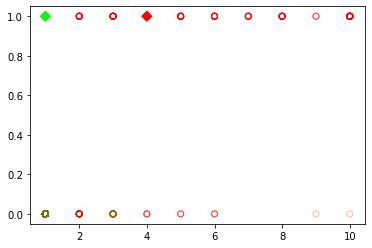

Final Cluter Values:  [[5.57115010e+00 3.86159844e+00 3.92982456e+00 3.39571150e+00
  3.68421053e+00 4.32553606e+00 3.95126706e+00 3.51072125e+00
  1.76608187e+00 4.67836257e-01]
 [1.23655914e+00 1.12903226e+00 1.21505376e+00 1.18279570e+00
  1.92473118e+00 1.33333333e+00 2.02150538e+00 1.09139785e+00
  1.10215054e+00 5.37634409e-03]]


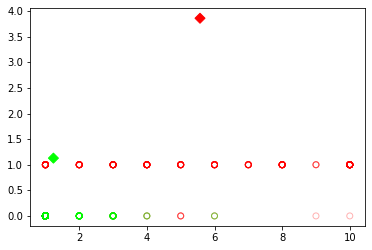

Final Cluter Values:  [[6.98513011e+00 6.28252788e+00 6.27881041e+00 5.30111524e+00
  5.17472119e+00 7.20074349e+00 5.71747212e+00 5.65427509e+00
  2.43866171e+00 8.92193309e-01]
 [2.81162791e+00 1.16511628e+00 1.28604651e+00 1.24651163e+00
  1.99069767e+00 1.23255814e+00 2.01162791e+00 1.12325581e+00
  1.05813953e+00 2.32558140e-03]]


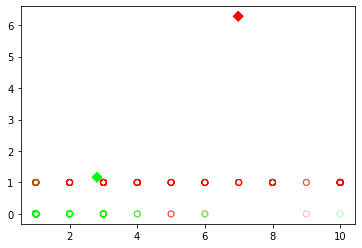

Final Cluter Values:  [[7.14107884 6.69709544 6.66390041 5.6473029  5.43153527 7.68049793
  6.00829876 6.01659751 2.55186722 0.94605809]
 [2.98471616 1.25982533 1.38864629 1.31222707 2.05021834 1.34497817
  2.08515284 1.20960699 1.08296943 0.02838428]]


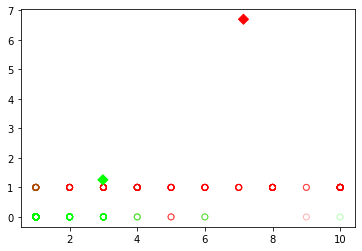

Final Cluter Values:  [[7.15677966 6.75847458 6.71610169 5.69915254 5.44491525 7.81355932
  6.06355932 6.04237288 2.54661017 0.95338983]
 [3.02159827 1.28725702 1.41900648 1.33261339 2.07991361 1.34557235
  2.09935205 1.24838013 1.10151188 0.03455724]]


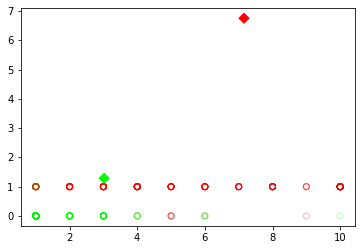

Final Cluter Values:  [[7.14893617 6.76595745 6.7106383  5.71914894 5.45957447 7.83404255
  6.08085106 6.06382979 2.53617021 0.95319149]
 [3.03448276 1.29525862 1.43318966 1.33189655 2.07974138 1.34913793
  2.09913793 1.24784483 1.10991379 0.03663793]]


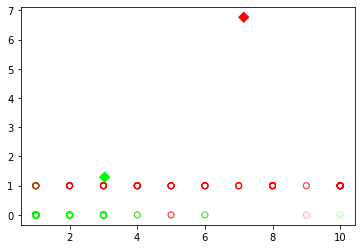

Final Cluter Values:  [[7.14957265 6.77777778 6.71367521 5.72649573 5.45726496 7.86324786
  6.08974359 6.07692308 2.54273504 0.95299145]
 [3.04301075 1.30107527 1.44301075 1.33763441 2.08817204 1.3483871
  2.10322581 1.2516129  1.10967742 0.03870968]]


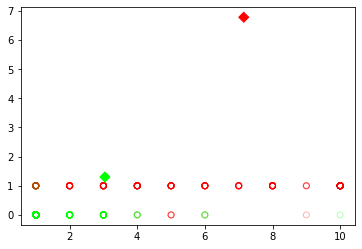

Final Cluter Values:  [[7.14957265 6.77777778 6.71367521 5.72649573 5.45726496 7.86324786
  6.08974359 6.07692308 2.54273504 0.95299145]
 [3.04301075 1.30107527 1.44301075 1.33763441 2.08817204 1.3483871
  2.10322581 1.2516129  1.10967742 0.03870968]]


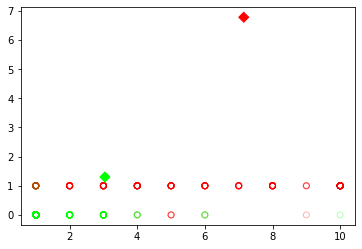

In [55]:
runKMeans(2, df)

Final Cluster Values:  [[7.14957265 6.77777778 6.71367521 5.72649573 5.45726496 7.86324786
  6.08974359 6.07692308 2.54273504 0.95299145]
 [3.04301075 1.30107527 1.44301075 1.33763441 2.08817204 1.3483871
  2.10322581 1.2516129  1.10967742 0.03870968]]

## Kmeans using sklearn

In [39]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
X = np.array(df.drop(['class'], 1))
y = np.array(df['class'])
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [56]:
kmeans = KMeans(n_clusters = 2, max_iter=1000, random_state=0)
kmeans.fit(X)
kmeans.cluster_centers_

array([[7.15879828, 6.79828326, 6.72961373, 5.73390558, 5.472103  ,
        7.86695279, 6.10300429, 6.07725322, 2.54935622],
       [3.0472103 , 1.30257511, 1.44635193, 1.34334764, 2.08798283,
        1.36051502, 2.10515021, 1.26180258, 1.10944206]])

#### Cluster values similar to our algorithm but not sure if we're supposed to standardize features^

In [ ]:
# number of clusters
wcss = []
for i in range(1,50):
    kmeans = KMeans(n_clusters=i,init= 'k-means++',max_iter=1000,random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,50),wcss)
plt.title('The Elbow Curve')
plt.xlabel('clusters')
plt.ylabel('WCSS')
plt.show()

#### Need more clusters??^

In [21]:
from sklearn.decomposition import PCA
  
pca = PCA(3)
pca.fit(df)
  
pca_data = pd.DataFrame(pca.transform(df))
  
print(pca_data.head())

          0         1         2
0 -4.450163  0.138269 -1.738765
1  4.812945 -4.861437  0.883325
2 -4.606417 -0.603443  0.029277
3  5.114643  3.467350 -2.026483
4 -4.085787 -0.036483  0.057245


In [22]:
from matplotlib import colors as mcolors
import math
clusters = 2   
''' Generating different colors in ascending order 
                                of their hsv values '''
colors = list(zip(*sorted((
                    tuple(mcolors.rgb_to_hsv(
                          mcolors.to_rgba(color)[:3])), name)
                     for name, color in dict(
                            mcolors.BASE_COLORS, **mcolors.CSS4_COLORS
                                                      ).items())))[1]
   
   
# number of steps to taken generate n(clusters) colors 
skips = math.floor(len(colors[5 : -5])/clusters)
cluster_colors = colors[5 : -5 : skips]

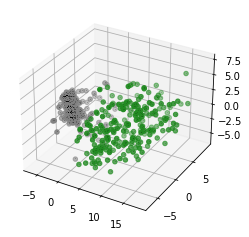

In [23]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
   
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(pca_data[0], pca_data[1], pca_data[2], 
           c = list(map(lambda label : cluster_colors[label],
                                            kmeans.labels_)))
   
str_labels = list(map(lambda label:'% s' % label, kmeans.labels_))
   
list(map(lambda data1, data2, data3, str_label:
        ax.text(data1, data2, data3, s = str_label, size = 0.6,
        zorder = 20, color = 'k'), pca_data[0], pca_data[1],
        pca_data[2], str_labels))
   
plt.show()